# 用神经网络来学习XOR函数迭代版

In [1]:
import numpy as np  # Note: there is a typo on this line in the video

[ -1.00000000e+00  -8.00000000e-01  -6.00000000e-01  -4.00000000e-01
  -2.00000000e-01  -2.22044605e-16   2.00000000e-01   4.00000000e-01
   6.00000000e-01   8.00000000e-01   1.00000000e+00   1.20000000e+00
   1.40000000e+00   1.60000000e+00   1.80000000e+00   2.00000000e+00
   2.20000000e+00   2.40000000e+00   2.60000000e+00   2.80000000e+00
   3.00000000e+00   3.20000000e+00   3.40000000e+00   3.60000000e+00
   3.80000000e+00   4.00000000e+00   4.20000000e+00   4.40000000e+00
   4.60000000e+00   4.80000000e+00] [  4.           3.4872136    2.79245553   2.13459667   1.53442719   1.
   0.53544512   0.14321596  -0.17508894  -0.41835921  -0.58578644
  -0.6767603   -0.69080666  -0.62754845  -0.48667995  -0.26794919
   0.02885438   0.40390889   0.8573666    1.38935887   2.           2.68939015
   3.4576177    4.30476106   5.23089023   6.23606798   7.32035085
   8.48379001   9.72643191  11.04831892]


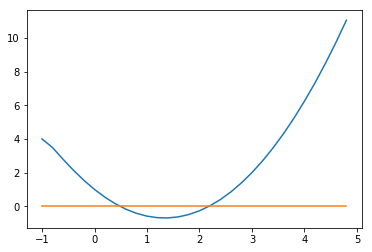

x,y,y1,yh
0.5
-0.0252551286084
2.1824
-0.00040199032178


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,5,0.2)

y=x*x+np.sqrt(x+1)-3*x

y0=(x+x)*0

print(x,y)

plt.plot(x,y)
plt.plot(x,y0)

plt.show()

print("x,y,y1,yh")

x=0.5
print(x)
yl=x*x+np.sqrt(x+1)-3*x
print(yl)

x=2.1824
print(x)
yh=x*x+np.sqrt(x+1)-3*x
print(yh)




# 首先，定义一个sigmod函数

In [3]:
def nonlin(x, deriv=False):  
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))

# 1/(1+exp(-x)) 导数推导

(1/(1+exp(-x)))'=((1+exp(-x))^-1)'=(-1)((1+exp(-x))^-2)(1+exp(-x))'=(-1)((1+exp(-x))^-2)(exp(-x))'
而(exp(-x))'可以先转成(exp(x)^-1)'，于是她又是一个复合函数的求导，即(exp(x)^-1)对exp(x)的导数再乘上exp(x)对x的导数，又基本初等函数求导公式告诉我们，(exp(x))'=exp(x)，所以(exp(-x))'=(exp(x)^-1)'=(-1)(exp(x)^-2)(exp(x))'=(-1)(exp(x)^-2)exp(x)=(-1)(exp(x)^-1)=(-1)exp(-x)
那么：
(-1)((1+exp(-x))^-2)(exp(-x))'=(-1)((1+exp(-x))^-2)(-1)exp(-x)=exp(-x)((1+exp(-x))^-2)=exp(-x)/((1+exp(-x))^2) 

![](dsigmoid.png)


[  4.53978687e-05   3.35350130e-04   2.47262316e-03   1.79862100e-02
   1.19202922e-01   5.00000000e-01   8.80797078e-01   9.82013790e-01
   9.97527377e-01   9.99664650e-01]


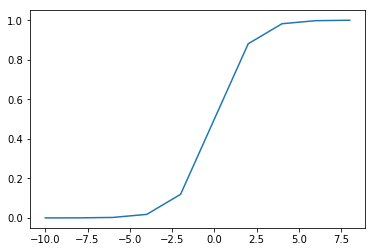

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-10,10,2)
y=nonlin(x)
print(y)
plt.plot(x,y)
plt.show()


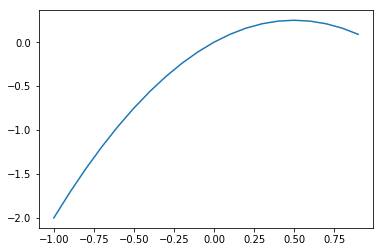

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-1,1,0.1)
yderiv=nonlin(x,deriv=True)
plt.plot(x,yderiv)
plt.show()


# 复习一下表格试凑法

![](weights_solution.png)

![](BPBSYN0SYN1.png)

In [6]:
syn0=np.array([[-10,-20,20,20],
              [-10,20,-20,20],
              [10,0.2,-1,-20]])
print(syn0)

syn1=np.array([[0],
              [1.0],
              [1.0],
              [0]])



[[-10.  -20.   20.   20. ]
 [-10.   20.  -20.   20. ]
 [ 10.    0.2  -1.  -20. ]]


# 所有可能的输入值放在一个向量中

In [7]:
#input data
xinputs = np.array([[0,0,1], 
            [0,1,1],
            [1,0,1],
            [1,1,1]])


# 计算第一层的线性输出


In [8]:
SO1=np.dot(xinputs,syn0)
print(SO1)

[[ 10.    0.2  -1.  -20. ]
 [  0.   20.2 -21.    0. ]
 [  0.  -19.8  19.    0. ]
 [-10.    0.2  -1.   20. ]]


In [9]:
l1=nonlin(SO1)
print(l1)

[[  9.99954602e-01   5.49833997e-01   2.68941421e-01   2.06115362e-09]
 [  5.00000000e-01   9.99999998e-01   7.58256042e-10   5.00000000e-01]
 [  5.00000000e-01   2.51749871e-09   9.99999994e-01   5.00000000e-01]
 [  4.53978687e-05   5.49833997e-01   2.68941421e-01   9.99999998e-01]]


In [10]:
SO2=np.dot(l1,syn1)
print(SO2)

[[ 0.81877542]
 [ 1.        ]
 [ 1.        ]
 [ 0.81877542]]


In [11]:
l2=nonlin(SO2)
print(l2)

[[ 0.69397633]
 [ 0.73105858]
 [ 0.73105858]
 [ 0.69397633]]


# 希望的的输出结果

In [12]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

# 误差是

In [13]:
l2_error=y-l2
print(l2_error)

[[-0.69397633]
 [ 0.26894142]
 [ 0.26894142]
 [-0.69397633]]


# 为了直观地得出总误差多大，引入绝对值平均值lmabs

In [14]:
#误差的平均绝对为
lms=np.mean(np.abs(l2_error))
print(lms)

#sk=[]
#yerrorlmss=[]
#syn1_0=[]
#sks=0

#syn1_0.append(syn1[0,0])
#sk.append(sks)
#yerrorlmss.append(lms)
#sks=sks+1


0.481458877718


# 利用误差修正第二层权值网络

In [15]:
l2_delta = l2_error*nonlin(l2, deriv=True)

In [16]:
print(l2_delta)

[[-0.14738196]
 [ 0.05287709]
 [ 0.05287709]
 [-0.14738196]]


# 计算第一层的误差

In [17]:
print(syn1)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]


In [18]:
print(syn1.T)

[[ 0.  1.  1.  0.]]


In [19]:
l1_error = l2_delta.dot(syn1.T)
print(l1_error)

[[ 0.         -0.14738196 -0.14738196  0.        ]
 [ 0.          0.05287709  0.05287709  0.        ]
 [ 0.          0.05287709  0.05287709  0.        ]
 [ 0.         -0.14738196 -0.14738196  0.        ]]


# 计算第一层的修正值

In [20]:
l1_delta = l1_error * nonlin(l1,deriv=True)
print(l1_delta)

[[  0.00000000e+00  -3.64794782e-02  -2.89770525e-02   0.00000000e+00]
 [  0.00000000e+00   8.92316747e-11   4.00943751e-11   0.00000000e+00]
 [  0.00000000e+00   1.33118013e-10   2.96259587e-10   0.00000000e+00]
 [  0.00000000e+00  -3.64794782e-02  -2.89770525e-02   0.00000000e+00]]


# 修正权值网络

In [21]:
syn1 += l1.T.dot(l2_delta)
syn0 += l0.T.dot(l1_delta)    

NameError: name 'l0' is not defined

In [22]:
print(syn0)
print(syn1)

[[-10.  -20.   20.   20. ]
 [-10.   20.  -20.   20. ]
 [ 10.    0.2  -1.  -20. ]]
[[-0.09450487]
 [ 0.89080587]
 [ 0.97360286]
 [-0.09450487]]


![](syn01delta.png)

# 机器迭代最终答案

In [23]:
#training step
# Python2 Note: In the follow command, you may improve 
#   performance by replacing 'range' with 'xrange'. 
for j in range(1000):  
    
    print("start forward calulate")
    l0 = xinputs
    print("l0")
    print(l0)    
    l1 = nonlin(np.dot(l0, syn0))
    print("l1")
    print(l1)
    l2 = nonlin(np.dot(l1, syn1))
    print("l2")
    print(l2)
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    
    print("l2")
    print(l2)
    
    print("l2_error")
    print(l2_error)
    
 #   lms=np.mean(np.abs(l2_error))
 #   syn1_0.append(syn1[0,0])
 #   sk.append(sks)
 #   yerrorlmss.append(lms)
 #   sks=sks+1
    
    print("Error:")
    print(lms)
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    print("nonline derive")
    print(nonlin(l2,deriv=True))
    
    print("l2_delta")      
    print(l2_delta)
          
    l1_error = l2_delta.dot(syn1.T)
    
    print("syn1.T")
    print(syn1.T)
    
    print("l1_error")
    print(l1_error)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    print("nonlin(l1,deriv=True)")
    print(nonlin(l1,deriv=True))
        
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    print("syn0 syn1")
    
    print(syn0)
    print(syn1)
    
print("Output after training")
print(l2)

print(syn1_0)
print(yerrorlmss)
   

start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99954602e-01   5.49833997e-01   2.68941421e-01   2.06115362e-09]
 [  5.00000000e-01   9.99999998e-01   7.58256042e-10   5.00000000e-01]
 [  5.00000000e-01   2.51749871e-09   9.99999994e-01   5.00000000e-01]
 [  4.53978687e-05   5.49833997e-01   2.68941421e-01   9.99999998e-01]]
l2
[[ 0.65861694]
 [ 0.68918267]
 [ 0.70663527]
 [ 0.65861501]]
l2
[[ 0.65861694]
 [ 0.68918267]
 [ 0.70663527]
 [ 0.65861501]]
l2_error
[[-0.65861694]
 [ 0.31081733]
 [ 0.29336473]
 [-0.65861501]]
Error:
0.481458877718
nonline derive
[[ 0.22484067]
 [ 0.21420992]
 [ 0.20730187]
 [ 0.22484128]]
l2_delta
[[-0.14808387]
 [ 0.06658015]
 [ 0.06081506]
 [-0.14808384]]
syn1.T
[[-0.09450487  0.89080587  0.97360286 -0.09450487]]
l1_error
[[ 0.01399465 -0.13191398 -0.14417488  0.01399465]
 [-0.00629215  0.05930999  0.06482263 -0.00629215]
 [-0.00574732  0.05417441  0.05920971 -0.00574732]
 [ 0.01399464 -0.13191395 -0.14417485  0.01399464]]
nonlin(l1,

syn1.T
[[-1.77729586  1.74671283  2.13232718 -1.47369074]]
l1_error
[[ 0.07917426 -0.07781185 -0.09499005  0.06564938]
 [-0.07629019  0.07497742  0.09152987 -0.06325798]
 [-0.05125624  0.05037424  0.06149514 -0.04250043]
 [ 0.07152092 -0.07029021 -0.08580788  0.05930342]]
nonlin(l1,deriv=True)
[[  1.23369544e-04   1.81547530e-01   9.31724789e-02   8.30430937e-10]
 [  1.40057325e-01   1.15657517e-08   1.51804646e-10   1.53648830e-01]
 [  1.58386307e-01   3.67321921e-10   2.79856638e-08   1.70742659e-01]
 [  6.14394181e-06   8.36417702e-02   4.26593241e-02   1.26976698e-08]]
syn0 syn1
[[-10.41131116 -20.5690016   19.54161853  19.6272336 ]
 [-10.60760249  19.43099842 -20.45838152  19.44671391]
 [  8.98128642  -1.18166583  -2.16621659 -20.9260525 ]]
[[-1.80891796]
 [ 1.77531165]
 [ 2.15473742]
 [-1.49949317]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99874275e-01   2.34752808e-01   1.02825538e-01   8.16452404e-10]
 [  1.64335648e-01   9.99999988e-01   1.493694

 [ 0.04179559 -0.0401799  -0.04508284  0.03496053]]
nonlin(l1,deriv=True)
[[  1.73273443e-04   1.46592001e-01   7.76148560e-02   6.06180999e-10]
 [  9.54649792e-02   1.84099984e-08   1.13723669e-10   1.09754884e-01]
 [  1.13461156e-01   2.30763406e-10   3.73568106e-08   1.27889207e-01]
 [  3.11322848e-06   5.15888004e-02   3.07953611e-02   2.38301301e-08]]
syn0 syn1
[[-10.56053264 -20.66467242  19.48011778  19.49021229]
 [-10.78718981  19.33532762 -20.51988232  19.27871798]
 [  8.65271502  -1.53528243  -2.3838159  -21.23106976]]
[[-2.40506618]
 [ 2.31118863]
 [ 2.58945168]
 [-2.01271172]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99825378e-01   1.77222117e-01   8.44151696e-02   6.01815760e-10]
 [  1.05790933e-01   9.99999981e-01   1.12992664e-10   1.24297147e-01]
 [  1.29226229e-01   2.28392643e-10   9.99999962e-01   1.49204052e-01]
 [  3.06638718e-06   5.39301237e-02   3.15665901e-02   9.99999976e-01]]
l2
[[ 0.14474037]
 [ 0.85894804]
 [ 0.87850508]
 [ 0.

0.481458877718
nonline derive
[[ 0.10206438]
 [ 0.09992982]
 [ 0.08952743]
 [ 0.10080757]]
l2_delta
[[-0.01177578]
 [ 0.0112532 ]
 [ 0.0088999 ]
 [-0.01146642]]
syn1.T
[[-2.65616085  2.537979    2.78245096 -2.24320682]]
l1_error
[[ 0.03127836 -0.02988668 -0.03276553  0.02641551]
 [-0.02989032  0.02856039  0.03131149 -0.02524326]
 [-0.02363956  0.02258775  0.02476353 -0.01996431]
 [ 0.03045666 -0.02910153 -0.03190475  0.02572155]]
nonlin(l1,deriv=True)
[[  1.97841984e-04   1.33115335e-01   7.20199108e-02   5.33417790e-10]
 [  8.11699671e-02   2.20578595e-08   1.01510357e-10   9.44699631e-02]
 [  9.77200799e-02   1.92600458e-10   4.18514279e-08   1.11600995e-01]
 [  2.38743308e-06   4.24521043e-02   2.70509204e-02   3.07748569e-08]]
syn0 syn1
[[-10.62305481 -20.69932541  19.45640221  19.43054825]
 [-10.85461443  19.30067464 -20.54359791  19.21312288]
 [  8.52291611  -1.67752704  -2.47134825 -21.35632892]]
[[-2.66595461]
 [ 2.54686086]
 [ 2.79011184]
 [-2.25234559]]
start forward calulate

 [  8.41135682  -1.8012221   -2.54826017 -21.4661433 ]]
[[-2.90374429]
 [ 2.76350363]
 [ 2.97916576]
 [-2.47723136]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99777721e-01   1.41702364e-01   7.25434556e-02   4.75743009e-10]
 [  7.58676905e-02   9.99999974e-01   9.17256586e-11   9.03670469e-02]
 [  9.39089807e-02   1.64334725e-10   9.99999954e-01   1.10144265e-01]
 [  1.89169596e-06   3.70758316e-02   2.46943216e-02   9.99999961e-01]]
l2
[[ 0.09150591]
 [ 0.91046641]
 [ 0.91935571]
 [ 0.09102287]]
l2
[[ 0.09150591]
 [ 0.91046641]
 [ 0.91935571]
 [ 0.09102287]]
l2_error
[[-0.09150591]
 [ 0.08953359]
 [ 0.08064429]
 [-0.09102287]]
Error:
0.481458877718
nonline derive
[[ 0.08313257]
 [ 0.08151733]
 [ 0.07414079]
 [ 0.08273771]]
l2_delta
[[-0.00760712]
 [ 0.00729854]
 [ 0.00597903]
 [-0.00753102]]
syn1.T
[[-2.90374429  2.76350363  2.97916576 -2.47723136]]
l1_error
[[ 0.02208914 -0.02102231 -0.02266288  0.0188446 ]
 [-0.02119309  0.02016954  0.02174356 -0.018080

l1
[[  9.99761879e-01   1.32581869e-01   6.93497579e-02   4.44146727e-10]
 [  6.89371296e-02   9.99999972e-01   8.62932151e-11   8.22280609e-02]
 [  8.54686250e-02   1.49560083e-10   9.99999951e-01   1.00457999e-01]
 [  1.64809928e-06   3.33001890e-02   2.29814281e-02   9.99999956e-01]]
l2
[[ 0.07897633]
 [ 0.92258521]
 [ 0.92952245]
 [ 0.07890945]]
l2
[[ 0.07897633]
 [ 0.92258521]
 [ 0.92952245]
 [ 0.07890945]]
l2_error
[[-0.07897633]
 [ 0.07741479]
 [ 0.07047755]
 [-0.07890945]]
Error:
0.481458877718
nonline derive
[[ 0.07273907]
 [ 0.07142174]
 [ 0.06551047]
 [ 0.07268275]]
l2_delta
[[-0.00574467]
 [ 0.0055291 ]
 [ 0.00461702]
 [-0.00573536]]
syn1.T
[[-3.05746078  2.90464967  3.10442843 -2.625322  ]]
l1_error
[[ 0.01756409 -0.01668624 -0.0178339   0.0150816 ]
 [-0.016905    0.0160601   0.01716469 -0.01451567]
 [-0.01411635  0.01341082  0.0143332  -0.01212116]
 [ 0.01753563 -0.0166592  -0.017805    0.01505716]]
nonlin(l1,deriv=True)
[[  2.38064662e-04   1.15003917e-01   6.45403689e-0

[[-0.06997122]
 [ 0.06869574]
 [ 0.06302739]
 [-0.07012492]]
Error:
0.481458877718
nonline derive
[[ 0.06507525]
 [ 0.06397663]
 [ 0.05905494]
 [ 0.06520741]]
l2_delta
[[-0.00455339]
 [ 0.00439492]
 [ 0.00372208]
 [-0.00457266]]
syn1.T
[[-3.18218761  3.01985035  3.20775811 -2.74680154]]
l1_error
[[ 0.01448976 -0.01375057 -0.01460619  0.01250727]
 [-0.01398547  0.01327201  0.01409785 -0.01207198]
 [-0.01184435  0.01124012  0.01193953 -0.01022381]
 [ 0.01455108 -0.01380876 -0.014668    0.0125602 ]]
nonlin(l1,deriv=True)
[[  2.51286777e-04   1.09918300e-01   6.24206707e-02   4.20616527e-10]
 [  5.98393446e-02   3.05917449e-08   8.22021852e-11   7.04617438e-02]
 [  7.30193082e-02   1.38872548e-10   5.16817531e-08   8.46009436e-02]
 [  1.47898307e-06   2.96649055e-02   2.12333350e-02   4.94946579e-08]]
syn0 syn1
[[-10.741047   -20.75857708  19.4132317   19.31452786]
 [-10.97322053  19.24142301 -20.58676849  19.09445713]
 [  8.28671488  -1.94121815  -2.63660537 -21.59101511]]
[[-3.18616372]


 [ 0.01237827 -0.01173856 -0.01241097  0.01073149]]
nonlin(l1,deriv=True)
[[  2.62669781e-04   1.05829244e-01   6.07039397e-02   4.02147269e-10]
 [  5.64724148e-02   3.25126111e-08   7.89585261e-11   6.65462937e-02]
 [  6.89964937e-02   1.30667866e-10   5.38048663e-08   8.00435421e-02]
 [  1.35337955e-06   2.77344771e-02   2.02717359e-02   5.41452964e-08]]
syn0 syn1
[[-10.76352752 -20.76911223  19.40515409  19.29197799]
 [-10.99483508  19.23088788 -20.59484611  19.07242858]
 [  8.24271833  -1.99113305  -2.66850248 -21.63559356]]
[[-3.29049388]
 [ 3.12038311]
 [ 3.29866561]
 [-2.85312025]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99736901e-01   1.20137043e-01   6.48577360e-02   4.01588348e-10]
 [  5.99672154e-02   9.99999967e-01   7.88598739e-11   7.15470131e-02]
 [  7.44121927e-02   1.30422064e-10   9.99999946e-01   8.75745805e-02]
 [  1.34967650e-06   2.84883675e-02   2.06698137e-02   9.99999946e-01]]
l2
[[ 0.06292554]
 [ 0.93813441]
 [ 0.942889  ]
 [ 0.

 [ 0.05497804]]
l2_delta
[[-0.00317308]
 [ 0.0030767 ]
 [ 0.00265636]
 [-0.00321001]]
syn1.T
[[-3.37240982  3.19672834  3.36812587 -2.93398876]]
l1_error
[[ 0.01070092 -0.01014347 -0.01068733  0.00930978]
 [-0.01037589  0.00983538  0.01036271 -0.009027  ]
 [-0.00895835  0.00849168  0.00894697 -0.00779374]
 [ 0.01082546 -0.01026152 -0.01081171  0.00941813]]
nonlin(l1,deriv=True)
[[  2.72067146e-04   1.02638284e-01   5.93548414e-02   3.88004241e-10]
 [  5.39215508e-02   3.41253578e-08   7.64526627e-11   6.35589970e-02]
 [  6.59282345e-02   1.24492569e-10   5.55684095e-08   7.65397452e-02]
 [  1.26134608e-06   2.62875862e-02   1.95325248e-02   5.81645038e-08]]
syn0 syn1
[[-10.78148049 -20.77737481  19.3987259   19.27388104]
 [-11.01191544  19.22262531 -20.60127432  19.05494398]
 [  8.20777014  -2.03098089  -2.69413174 -21.67117512]]
[[-3.37521757]
 [ 3.19934985]
 [ 3.37051718]
 [-2.93676706]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99727547e-01   1.15988309

syn0 syn1
[[-10.78995465 -20.78123022  19.39569779  19.26531298]
 [-11.01992557  19.21876991 -20.60430244  19.04672198]
 [  8.19132818  -2.04979066  -2.70628273 -21.68796519]]
[[-3.41566282]
 [ 3.23714679]
 [ 3.40503964]
 [-2.9768332 ]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99723031e-01   1.14073535e-01   6.26036429e-02   3.81097758e-10]
 [  5.57982484e-02   9.99999965e-01   7.52214139e-11   6.65307852e-02]
 [  6.92268710e-02   1.21510446e-10   9.99999944e-01   8.14615820e-02]
 [  1.21769205e-06   2.62816536e-02   1.95528559e-02   9.99999940e-01]]
l2
[[ 0.05560475]
 [ 0.94524149]
 [ 0.94912101]
 [ 0.05597849]]
l2
[[ 0.05560475]
 [ 0.94524149]
 [ 0.94912101]
 [ 0.05597849]]
l2_error
[[-0.05560475]
 [ 0.05475851]
 [ 0.05087899]
 [-0.05597849]]
Error:
0.481458877718
nonline derive
[[ 0.05251286]
 [ 0.05176002]
 [ 0.04829032]
 [ 0.0528449 ]]
l2_delta
[[-0.00291996]
 [ 0.0028343 ]
 [ 0.00245696]
 [-0.00295818]]
syn1.T
[[-3.41566282  3.23714679  3.40503964 -

[[-3.48612239  3.30314603  3.46551543 -3.04682501]]
l1_error
[[ 0.00888373 -0.00841745 -0.00883122  0.00776426]
 [-0.00863822  0.00818482  0.00858716 -0.00754969]
 [-0.00753554  0.00714002  0.007491   -0.00658596]
 [ 0.00901942 -0.00854602 -0.0089661   0.00788285]]
nonlin(l1,deriv=True)
[[  2.84829209e-04   9.85508922e-02   5.76126010e-02   3.70223861e-10]
 [  5.07497770e-02   3.63544257e-08   7.32721227e-11   5.98207995e-02]
 [  6.20896600e-02   1.16859318e-10   5.79804788e-08   7.21239980e-02]
 [  1.15064803e-06   2.45072729e-02   1.85991719e-02   6.38854776e-08]]
syn0 syn1
[[-10.80503654 -20.78802332  19.39031715  19.25002473]
 [-11.0341036   19.21197681 -20.60968308  19.03213554]
 [  8.1621472   -2.08327542  -2.72800013 -21.7178399 ]]
[[-3.48839333]
 [ 3.30527643]
 [ 3.46747154]
 [-3.04908476]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99714832e-01   1.10733020e-01   6.13412114e-02   3.69880958e-10]
 [  5.35573971e-02   9.99999964e-01   7.32104306e-11 

 [  1.10600775e-06   2.37759774e-02   1.82076040e-02   6.65295563e-08]]
syn0 syn1
[[-10.81522976 -20.79256609  19.3866863   19.2396647 ]
 [-11.04363205  19.20743405 -20.61331395  19.02230954]
 [  8.1424816   -2.10591608  -2.74274842 -21.73802593]]
[[-3.53810795]
 [ 3.35196469]
 [ 3.51040134]
 [-3.09861241]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99709170e-01   1.08523138e-01   6.04975009e-02   3.62489382e-10]
 [  5.20967217e-02   9.99999963e-01   7.18771741e-11   6.20523129e-02]
 [  6.46007060e-02   1.13583579e-10   9.99999941e-01   7.59731437e-02]
 [  1.10420901e-06   2.43386928e-02   1.85351718e-02   9.99999933e-01]]
l2
[[ 0.04922187]
 [ 0.95144869]
 [ 0.95462796]
 [ 0.04964359]]
l2
[[ 0.04922187]
 [ 0.95144869]
 [ 0.95462796]
 [ 0.04964359]]
l2_error
[[-0.04922187]
 [ 0.04855131]
 [ 0.04537204]
 [-0.04964359]]
Error:
0.481458877718
nonline derive
[[ 0.04679908]
 [ 0.04619408]
 [ 0.04331342]
 [ 0.04717911]]
l2_delta
[[-0.00230354]
 [ 0.00224278]
 [ 0.

syn1.T
[[-3.60030911  3.41051352  3.56439764 -3.16072847]]
l1_error
[[ 0.00734538 -0.00695816 -0.00727211  0.00644854]
 [-0.00716275  0.00678515  0.0070913  -0.00628821]
 [-0.00630847  0.00597591  0.00624555 -0.00553824]
 [ 0.00748051 -0.00708616 -0.00740589  0.00656717]]
nonlin(l1,deriv=True)
[[  2.97889331e-04   9.46372663e-02   5.59273431e-02   3.53543555e-10]
 [  4.78111995e-02   3.86817757e-08   7.02545003e-11   5.63354401e-02]
 [  5.85113554e-02   1.09828291e-10   6.04708967e-08   6.79771473e-02]
 [  1.05177302e-06   2.28764127e-02   1.77189756e-02   7.00559603e-08]]
syn0 syn1
[[-10.82821982 -20.79830044  19.38206512  19.22643159]
 [-11.05571533  19.20169971 -20.61793514  19.00982346]
 [  8.11748309  -2.13478524  -2.76163077 -21.76374515]]
[[-3.6021392 ]
 [ 3.4122384 ]
 [ 3.56599103]
 [-3.16255845]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99701810e-01   1.05761568e-01   5.94331392e-02   3.53285307e-10]
 [  5.02956445e-02   9.99999961e-01   7.020750

nonline derive
[[ 0.04229714]
 [ 0.04180269]
 [ 0.03935396]
 [ 0.04269709]]
l2_delta
[[-0.00187189]
 [ 0.00182734]
 [ 0.00161501]
 [-0.00190833]]
syn1.T
[[-3.64424781  3.45196122  3.60272663 -3.20470053]]
l1_error
[[ 0.00682163 -0.00646169 -0.00674391  0.00599885]
 [-0.0066593   0.00630792  0.00658342 -0.00585609]
 [-0.0058855   0.00557496  0.00581844 -0.00517563]
 [ 0.00695444 -0.00658749 -0.00687521  0.00611564]]
nonlin(l1,deriv=True)
[[  3.02978307e-04   9.31807180e-02   5.52953919e-02   3.47419692e-10]
 [  4.67416184e-02   3.96012771e-08   6.91377114e-11   5.50619295e-02]
 [  5.72039655e-02   1.07278188e-10   6.14476889e-08   6.64551026e-02]
 [  1.01666297e-06   2.22872507e-02   1.73946086e-02   7.25474367e-08]]
syn0 syn1
[[-10.83701424 -20.8021486   19.37893993  19.21745403]
 [-11.06385966  19.19785155 -20.62106034  19.0013922 ]
 [  8.10059725  -2.15434291  -2.77447253 -21.78115397]]
[[-3.64593093]
 [ 3.45355037]
 [ 3.60419788]
 [-3.20638639]]
start forward calulate
l0
[[0 0 1]
 [

syn1.T
[[-3.67850222  3.48432423  3.63271254 -3.23903154]]
l1_error
[[ 0.00643748 -0.00609766 -0.00635735  0.00566839]
 [-0.00628963  0.00595761  0.00621133 -0.0055382 ]
 [-0.00557347  0.00527926  0.00550409 -0.0049076 ]
 [ 0.00656789 -0.00622119 -0.00648614  0.00578323]]
nonlin(l1,deriv=True)
[[  3.06969611e-04   9.20638146e-02   5.48089369e-02   3.42754270e-10]
 [  4.59301751e-02   4.03273968e-08   6.82834991e-11   5.40941159e-02]
 [  5.62104139e-02   1.05346577e-10   6.22163863e-08   6.52960559e-02]
 [  9.90339277e-07   2.18418625e-02   1.71470271e-02   7.45358450e-08]]
syn0 syn1
[[-10.84382151 -20.80510878  19.37652261  19.21049509]
 [-11.0701445   19.19489138 -20.62347767  18.99487776]
 [  8.08754739  -2.16948982  -2.78444618 -21.79462737]]
[[-3.68007861]
 [ 3.48581464]
 [ 3.63409468]
 [-3.2406125 ]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99692752e-01   1.02523967e-01   5.81704851e-02   3.42541818e-10]
 [  4.82182991e-02   9.99999960e-01   6.824452

 [  9.60003711e-07   2.13245584e-02   1.68568270e-02   7.69678565e-08]]
syn0 syn1
[[-10.85190757 -20.80860451  19.37365296  19.20221797]
 [-11.07758894  19.19139566 -20.62634733  18.98715242]
 [  8.07206859  -2.18749287  -2.79633267 -21.81062984]]
[[-3.72093143]
 [ 3.52447151]
 [ 3.66997965]
 [-3.28161407]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99687960e-01   1.00879270e-01   5.75226737e-02   3.37103929e-10]
 [  4.71771048e-02   9.99999959e-01   6.72448960e-11   5.60686072e-02]
 [  5.84234128e-02   1.03020061e-10   9.99999937e-01   6.85990051e-02]
 [  9.58948111e-07   2.17808685e-02   1.71404167e-02   9.99999923e-01]]
l2
[[ 0.04096863]
 [ 0.95949311]
 [ 0.9618552 ]
 [ 0.04140979]]
l2
[[ 0.04096863]
 [ 0.95949311]
 [ 0.9618552 ]
 [ 0.04140979]]
l2_error
[[-0.04096863]
 [ 0.04050689]
 [ 0.0381448 ]
 [-0.04140979]]
Error:
0.481458877718
nonline derive
[[ 0.0392902 ]
 [ 0.03886608]
 [ 0.03668978]
 [ 0.03969502]]
l2_delta
[[-0.00160967]
 [ 0.00157434]
 [ 0.

[[-0.03937884]
 [ 0.03895456]
 [ 0.03673823]
 [-0.03981849]]
Error:
0.481458877718
nonline derive
[[ 0.03782815]
 [ 0.0374371 ]
 [ 0.03538853]
 [ 0.03823298]]
l2_delta
[[-0.00148963]
 [ 0.00145835]
 [ 0.00130011]
 [-0.00152238]]
syn1.T
[[-3.7601553   3.56164516  3.70455242 -3.32103442]]
l1_error
[[ 0.00560124 -0.00530553 -0.00551841  0.00494711]
 [-0.00548361  0.00519411  0.00540252 -0.00484322]
 [-0.00488862  0.00463054  0.00481633 -0.00431772]
 [ 0.00572438 -0.00542218 -0.00563973  0.00505587]]
nonlin(l1,deriv=True)
[[  3.16566968e-04   8.94659165e-02   5.36708534e-02   3.32003626e-10]
 [  4.40717586e-02   4.20912025e-08   6.63034655e-11   5.18724312e-02]
 [  5.39296166e-02   1.00932093e-10   6.40743651e-08   6.26279200e-02]
 [  9.31068320e-07   2.08269634e-02   1.65749235e-02   7.94411017e-08]]
syn0 syn1
[[-10.85987572 -20.8120278   19.37082689  19.19405036]
 [-11.08490321  19.18797237 -20.6291734   18.97955302]
 [  8.05683878  -2.20524589  -2.80808868 -21.82639686]]
[[-3.76150271]


l1
[[  9.99678560e-01   9.77799733e-02   5.62897209e-02   3.26893465e-10]
 [  4.52407858e-02   9.99999957e-01   6.53563612e-11   5.37050286e-02]
 [  5.59841894e-02   9.88515355e-11   9.99999935e-01   6.56746056e-02]
 [  9.03569162e-07   2.07820370e-02   1.65769681e-02   9.99999918e-01]]
l2
[[ 0.03781023]
 [ 0.96257808]
 [ 0.96465433]
 [ 0.03824679]]
l2
[[ 0.03781023]
 [ 0.96257808]
 [ 0.96465433]
 [ 0.03824679]]
l2_error
[[-0.03781023]
 [ 0.03742192]
 [ 0.03534567]
 [-0.03824679]]
Error:
0.481458877718
nonline derive
[[ 0.03638062]
 [ 0.03602152]
 [ 0.03409635]
 [ 0.03678397]]
l2_delta
[[-0.00137556]
 [ 0.00134799]
 [ 0.00120516]
 [-0.00140687]]
syn1.T
[[-3.80037417  3.5998203   3.74012075 -3.36150658]]
l1_error
[[ 0.00522764 -0.00495177 -0.00514476  0.00462395]
 [-0.00512288  0.00485254  0.00504166 -0.00453129]
 [-0.00458005  0.00433835  0.00450744 -0.00405115]
 [ 0.00534663 -0.00506447 -0.00526186  0.0047292 ]]
nonlin(l1,deriv=True)
[[  3.21336561e-04   8.82190501e-02   5.31211883e-0

l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99674666e-01   9.65431378e-02   5.57930880e-02   3.22832339e-10]
 [  4.44774204e-02   9.99999956e-01   6.46008567e-11   5.27720937e-02]
 [  5.50214771e-02   9.72062304e-11   9.99999934e-01   6.45186706e-02]
 [  8.82021881e-07   2.03895196e-02   1.63524288e-02   9.99999916e-01]]
l2
[[ 0.03658132]
 [ 0.96377951]
 [ 0.96574865]
 [ 0.03701437]]
l2
[[ 0.03658132]
 [ 0.96377951]
 [ 0.96574865]
 [ 0.03701437]]
l2_error
[[-0.03658132]
 [ 0.03622049]
 [ 0.03425135]
 [-0.03701437]]
Error:
0.481458877718
nonline derive
[[ 0.03524313]
 [ 0.03490857]
 [ 0.0330782 ]
 [ 0.0356443 ]]
l2_delta
[[-0.00128924]
 [ 0.00126441]
 [ 0.00113297]
 [-0.00131935]]
syn1.T
[[-3.83301938  3.63084974  3.76907794 -3.39439417]]
l1_error
[[ 0.00494168 -0.00468104 -0.00485925  0.00437619]
 [-0.00484649  0.00459087  0.00476564 -0.00429189]
 [-0.00434271  0.00411366  0.00427026 -0.00384576]
 [ 0.0050571  -0.00479037 -0.00497274  0.0044784 ]]
nonlin(l1,deriv=True)
[[  3.25228

syn0 syn1
[[-10.87988897 -20.82053458  19.3637354   19.17348968]
 [-11.10318456  19.17946561 -20.63626492  18.96052143]
 [  8.018684    -2.2498977   -2.83781135 -21.86598916]]
[[-3.86482012]
 [ 3.66111325]
 [ 3.79735962]
 [-3.42646131]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99670855e-01   9.53582897e-02   5.53147947e-02   3.18949237e-10]
 [  4.37511384e-02   9.99999956e-01   6.38760733e-11   5.18839348e-02]
 [  5.41049997e-02   9.56397800e-11   9.99999933e-01   6.34173983e-02]
 [  8.61672647e-07   2.00167382e-02   1.61374926e-02   9.99999914e-01]]
l2
[[ 0.03542122]
 [ 0.96491426]
 [ 0.9667844 ]
 [ 0.03585008]]
l2
[[ 0.03542122]
 [ 0.96491426]
 [ 0.9667844 ]
 [ 0.03585008]]
l2_error
[[-0.03542122]
 [ 0.03508574]
 [ 0.0332156 ]
 [-0.03585008]]
Error:
0.481458877718
nonline derive
[[ 0.03416656]
 [ 0.03385473]
 [ 0.03211232]
 [ 0.03456485]]
l2_delta
[[-0.00121022]
 [ 0.00118782]
 [ 0.00106663]
 [-0.00123915]]
syn1.T
[[-3.86482012  3.66111325  3.79735962 -

 [ 0.03489527]]
l2
[[ 0.03447045]
 [ 0.9658447 ]
 [ 0.96763526]
 [ 0.03489527]]
l2_error
[[-0.03447045]
 [ 0.0341553 ]
 [ 0.03236474]
 [-0.03489527]]
Error:
0.481458877718
nonline derive
[[ 0.03328224]
 [ 0.03298872]
 [ 0.03131727]
 [ 0.03367759]]
l2_delta
[[-0.00114725]
 [ 0.00112674]
 [ 0.00101358]
 [-0.00117519]]
syn1.T
[[-3.89164025  3.68666483  3.82126748 -3.45352843]]
l1_error
[[ 0.0044647  -0.00422954 -0.00438396  0.00396207]
 [-0.00438486  0.00415391  0.00430557 -0.00389123]
 [-0.00394447  0.00373671  0.00387314 -0.00350041]
 [ 0.00457341 -0.00433253 -0.00449071  0.00405855]]
nonlin(l1,deriv=True)
[[  3.32261096e-04   8.54676043e-02   5.18998486e-02   3.15729130e-10]
 [  4.12894926e-02   4.50296107e-08   6.32732243e-11   4.85339722e-02]
 [  5.05020072e-02   9.43457644e-11   6.71429714e-08   5.86000357e-02]
 [  8.44984367e-07   1.93210156e-02   1.57043802e-02   8.78418716e-08]]
syn0 syn1
[[-10.88521851 -20.82277845  19.36184832  19.16800372]
 [-11.10803237  19.17722175 -20.63815

syn0 syn1
[[-10.88968092 -20.82465045  19.36026865  19.16340705]
 [-11.11208509  19.17534975 -20.63973168  18.95123731]
 [  8.00006417  -2.27178121  -2.85246009 -21.88535593]]
[[-3.91613141]
 [ 3.71001971]
 [ 3.84314314]
 [-3.47826235]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99664671e-01   9.34871505e-02   5.45542912e-02   3.12831649e-10]
 [  4.26141182e-02   9.99999954e-01   6.27293437e-11   5.04924997e-02]
 [  5.26692373e-02   9.31852515e-11   9.99999932e-01   6.16905591e-02]
 [  8.30114104e-07   1.94344563e-02   1.57983838e-02   9.99999911e-01]]
l2
[[ 0.0336238 ]
 [ 0.9666736 ]
 [ 0.96839447]
 [ 0.03404455]]
l2
[[ 0.0336238 ]
 [ 0.9666736 ]
 [ 0.96839447]
 [ 0.03404455]]
l2_error
[[-0.0336238 ]
 [ 0.0333264 ]
 [ 0.03160553]
 [-0.03404455]]
Error:
0.481458877718
nonline derive
[[ 0.03249324]
 [ 0.03221576]
 [ 0.03060662]
 [ 0.03288552]]
l2_delta
[[-0.00109255]
 [ 0.00107364]
 [ 0.00096734]
 [-0.00111957]]
syn1.T
[[-3.91613141  3.71001971  3.84314314 -

l1
[[  9.99660809e-01   9.23496862e-02   5.40888145e-02   3.09121623e-10]
 [  4.19288636e-02   9.99999954e-01   6.20309268e-11   4.96533764e-02]
 [  5.18033923e-02   9.17046167e-11   9.99999932e-01   6.06483056e-02]
 [  8.11272247e-07   1.90843153e-02   1.55924301e-02   9.99999908e-01]]
l2
[[ 0.03255213]
 [ 0.96772326]
 [ 0.96935753]
 [ 0.03296713]]
l2
[[ 0.03255213]
 [ 0.96772326]
 [ 0.96935753]
 [ 0.03296713]]
l2_error
[[-0.03255213]
 [ 0.03227674]
 [ 0.03064247]
 [-0.03296713]]
Error:
0.481458877718
nonline derive
[[ 0.03149249]
 [ 0.03123495]
 [ 0.02970351]
 [ 0.0318803 ]]
l2_delta
[[-0.00102515]
 [ 0.00100816]
 [ 0.00091019]
 [-0.001051  ]]
syn1.T
[[-3.94800041  3.74044145  3.87167067 -3.51047096]]
l1_error
[[ 0.00404728 -0.00383451 -0.00396903  0.00359875]
 [-0.00398023  0.00377097  0.00390327 -0.00353912]
 [-0.00359343  0.00340451  0.00352395 -0.00319519]
 [ 0.00414936 -0.00393121 -0.00406913  0.00368951]]
nonlin(l1,deriv=True)
[[  3.39076090e-04   8.38212217e-02   5.11632146e-0

 [ 0.0312032 ]]
l2_delta
[[-0.00098102]
 [ 0.00096527]
 [ 0.00087266]
 [-0.00100608]]
syn1.T
[[-3.96998964  3.76145256  3.89139463 -3.53270963]]
l1_error
[[ 0.00389466 -0.00369008 -0.00381755  0.00346567]
 [-0.0038321   0.00363081  0.00375624 -0.00341001]
 [-0.00346444  0.00328246  0.00339586 -0.00308285]
 [ 0.00399412 -0.00378432 -0.00391505  0.00355418]]
nonlin(l1,deriv=True)
[[  3.41748948e-04   8.31895471e-02   5.08793775e-02   3.06600812e-10]
 [  3.97457585e-02   4.68385850e-08   6.15550687e-11   4.66759186e-02]
 [  4.85940059e-02   9.07019921e-11   6.90170978e-08   5.63492573e-02]
 [  7.98596734e-07   1.84924585e-02   1.52135851e-02   9.31503028e-08]]
syn0 syn1
[[-10.90002298 -20.82896552  19.35660884  19.1527427 ]
 [-11.12145613  19.17103469 -20.6433915   18.94145022]
 [  7.98043099  -2.29492321  -2.86801077 -21.90580738]]
[[-3.97088561]
 [ 3.76230903]
 [ 3.892199  ]
 [-3.53361602]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99658025e-01   9.15442920

 [ 0.0313182 ]]
l2
[[ 0.0309133 ]
 [ 0.96932953]
 [ 0.97083485]
 [ 0.0313182 ]]
l2_error
[[-0.0309133 ]
 [ 0.03067047]
 [ 0.02916515]
 [-0.0313182 ]]
Error:
0.481458877718
nonline derive
[[ 0.02995767]
 [ 0.02972979]
 [ 0.02831454]
 [ 0.03033737]]
l2_delta
[[-0.00092609]
 [ 0.00091183]
 [ 0.0008258 ]
 [-0.00095011]]
syn1.T
[[-3.99875545  3.78896381  3.91724613 -3.56181973]]
l1_error
[[ 0.00370321 -0.00350892 -0.00362772  0.00329857]
 [-0.00364617  0.00345488  0.00357185 -0.00324776]
 [-0.00330216  0.00312892  0.00323485 -0.00294134]
 [ 0.00379926 -0.00359994 -0.00372182  0.00338413]]
nonlin(l1,deriv=True)
[[  3.45257199e-04   8.23721146e-02   5.05110485e-02   3.03350402e-10]
 [  3.91990538e-02   4.75136889e-08   6.09398892e-11   4.60170185e-02]
 [  4.79173127e-02   8.94132415e-11   6.97138150e-08   5.55496336e-02]
 [  7.82405093e-07   1.82002381e-02   1.50383681e-02   9.51572133e-08]]
syn0 syn1
[[-10.90540318 -20.83119757  19.35470553  19.14718889]
 [-11.12631966  19.16880265 -20.64529

l2
[[ 0.0302663 ]
 [ 0.96996404]
 [ 0.97141963]
 [ 0.03066678]]
l2
[[ 0.0302663 ]
 [ 0.96996404]
 [ 0.97141963]
 [ 0.03066678]]
l2_error
[[-0.0302663 ]
 [ 0.03003596]
 [ 0.02858037]
 [-0.03066678]]
Error:
0.481458877718
nonline derive
[[ 0.02935025]
 [ 0.0291338 ]
 [ 0.02776353]
 [ 0.02972633]]
l2_delta
[[-0.00088832]
 [ 0.00087506]
 [ 0.00079349]
 [-0.00091161]]
syn1.T
[[-4.01951466  3.80883508  3.93593632 -3.58283964]]
l1_error
[[ 0.00357063 -0.00338348 -0.00349638  0.00318272]
 [-0.00351732  0.00333296  0.00344419 -0.0031352 ]
 [-0.00318945  0.00302228  0.00312313 -0.00284296]
 [ 0.00366423 -0.00347218 -0.00358804  0.00326616]]
nonlin(l1,deriv=True)
[[  3.47797127e-04   8.17884165e-02   5.02473195e-02   3.01037446e-10]
 [  3.88109918e-02   4.80045486e-08   6.05010252e-11   4.55490551e-02]
 [  4.74366824e-02   8.84989658e-11   7.02195066e-08   5.49812785e-02]
 [  7.70987097e-07   1.79931991e-02   1.49135372e-02   9.66250695e-08]]
syn0 syn1
[[-10.90926752 -20.83279543  19.35333869  19

l2
[[ 0.02951608]
 [ 0.97070006]
 [ 0.97209881]
 [ 0.02991114]]
l2_error
[[-0.02951608]
 [ 0.02929994]
 [ 0.02790119]
 [-0.02991114]]
Error:
0.481458877718
nonline derive
[[ 0.02864488]
 [ 0.02844146]
 [ 0.02712272]
 [ 0.02901647]]
l2_delta
[[-0.00084548]
 [ 0.00083333]
 [ 0.00075676]
 [-0.00086792]]
syn1.T
[[-4.04413196  3.83241822  3.95813673 -3.60777899]]
l1_error
[[ 0.00341925 -0.00324025 -0.00334654  0.00305032]
 [-0.00337011  0.00319368  0.00329845 -0.00300648]
 [-0.00306042  0.00290021  0.00299534 -0.00273021]
 [ 0.00350997 -0.00332622 -0.00343533  0.00313125]]
nonlin(l1,deriv=True)
[[  3.50817886e-04   8.11029180e-02   4.99368160e-02   2.98329607e-10]
 [  3.83577061e-02   4.85906217e-08   5.99860471e-11   4.50021724e-02]
 [  4.68749628e-02   8.74315401e-11   7.08223380e-08   5.43166130e-02]
 [  7.57729143e-07   1.77517678e-02   1.47672358e-02   9.83870958e-08]]
syn0 syn1
[[-10.91383018 -20.83467638  19.35172508  19.13848211]
 [-11.13392218  19.16532384 -20.64827529  18.92841245

 [  7.47300883e-07   1.75610751e-02   1.46511139e-02   9.98186536e-08]]
syn0 syn1
[[-10.91747785 -20.83617576  19.35043521  19.13471045]
 [-11.13720737  19.16382446 -20.64956516  18.9249733 ]
 [  7.94736759  -2.33405537  -2.8944473  -21.94031659]]
[[-4.06464156]
 [ 3.85208165]
 [ 3.97666277]
 [-3.62856727]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99646533e-01   8.83415090e-02   5.24287366e-02   2.96102158e-10]
 [  3.95498650e-02   9.99999951e-01   5.95614564e-11   4.67375078e-02]
 [  4.87946049e-02   8.65558595e-11   9.99999929e-01   5.70219815e-02]
 [  7.46912058e-07   1.78733996e-02   1.48678117e-02   9.99999900e-01]]
l2
[[ 0.02890486]
 [ 0.97129992]
 [ 0.97265303]
 [ 0.02929528]]
l2
[[ 0.02890486]
 [ 0.97129992]
 [ 0.97265303]
 [ 0.02929528]]
l2_error
[[-0.02890486]
 [ 0.02870008]
 [ 0.02734697]
 [-0.02929528]]
Error:
0.481458877718
nonline derive
[[ 0.02806937]
 [ 0.02787639]
 [ 0.02659911]
 [ 0.02843707]]
l2_delta
[[-0.00081134]
 [ 0.00080005]
 [ 0.

 [ 0.02873577]]
l2_error
[[-0.02834974]
 [ 0.02815511]
 [ 0.02684292]
 [-0.02873577]]
Error:
0.481458877718
nonline derive
[[ 0.02754604]
 [ 0.0273624 ]
 [ 0.02612237]
 [ 0.02791002]]
l2_delta
[[-0.00078092]
 [ 0.00077039]
 [ 0.0007012 ]
 [-0.00080202]]
syn1.T
[[-4.08363728  3.87030608  3.99384544 -3.64782927]]
l1_error
[[ 0.00318901 -0.00302241 -0.00311889  0.00284867]
 [-0.003146    0.00298165  0.00307682 -0.00281026]
 [-0.00286345  0.00271386  0.00280049 -0.00255786]
 [ 0.00327514 -0.00310405 -0.00320313  0.00292562]]
nonlin(l1,deriv=True)
[[  3.55685266e-04   8.00178122e-02   4.94435518e-02   2.94061940e-10]
 [  3.76455786e-02   4.95401995e-08   5.91717751e-11   4.41424475e-02]
 [  4.59918331e-02   8.57556670e-11   7.17969343e-08   5.32707486e-02]
 [  7.37072910e-07   1.73733565e-02   1.45363073e-02   1.01263564e-07]]
syn0 syn1
[[-10.92110733 -20.83766385  19.34915191  19.13095593]
 [-11.14047289  19.16233639 -20.65084846  18.92155342]
 [  7.94050356  -2.3422048   -2.89997533 -21.9

 [ 0.02810761]]
l2_error
[[-0.02772672]
 [ 0.02754327]
 [ 0.02627641]
 [-0.02810761]]
Error:
0.481458877718
nonline derive
[[ 0.02695795]
 [ 0.02678463]
 [ 0.02558596]
 [ 0.02731757]]
l2_delta
[[-0.00074746]
 [ 0.00073774]
 [ 0.00067231]
 [-0.00076783]]
syn1.T
[[-4.1053927   3.89119271  4.01355259 -3.66989904]]
l1_error
[[ 0.0030686  -0.00290849 -0.00299995  0.00274309]
 [-0.0030287   0.00287067  0.00296094 -0.00270742]
 [-0.00276008  0.00261608  0.00269834 -0.0024673 ]
 [ 0.00315225 -0.00298778 -0.00308173  0.00281786]]
nonlin(l1,deriv=True)
[[  3.58375989e-04   7.94280282e-02   4.91745293e-02   2.91751902e-10]
 [  3.72612802e-02   5.00679048e-08   5.87296477e-11   4.36782305e-02]
 [  4.55149345e-02   8.48518196e-11   7.23374340e-08   5.27055387e-02]
 [  7.26013522e-07   1.71695985e-02   1.44111270e-02   1.02873484e-07]]
syn0 syn1
[[-10.92509129 -20.83929292  19.34774341  19.12683283]
 [-11.14405366  19.16070732 -20.65225697  18.91780191]
 [  7.93297336  -2.35115537  -2.90605581 -21.9

l1_error
[[ 0.00299934 -0.00284297 -0.00293158  0.00268231]
 [-0.00296119  0.00280681  0.00289429 -0.00264819]
 [-0.00270051  0.00255972  0.0026395  -0.00241507]
 [ 0.00308153 -0.00292088 -0.00301191  0.00275581]]
nonlin(l1,deriv=True)
[[  3.59973144e-04   7.90812711e-02   4.90160528e-02   2.90396866e-10]
 [  3.70362403e-02   5.03820728e-08   5.84698477e-11   4.34063081e-02]
 [  4.52355683e-02   8.43227081e-11   7.26588519e-08   5.23743037e-02]
 [  7.19565888e-07   1.70504278e-02   1.43376382e-02   1.03835770e-07]]
syn0 syn1
[[-10.92744318 -20.8402525   19.34691198  19.12439789]
 [-11.14616574  19.15974774 -20.65308841  18.91558842]
 [  7.92853004  -2.35644184  -2.90965157 -21.96001406]]
[[-4.11894785]
 [ 3.90421434]
 [ 4.02584661]
 [-3.68365501]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99639814e-01   8.65551008e-02   5.16785085e-02   2.90326762e-10]
 [  3.85074275e-02   9.99999950e-01   5.84563975e-11   4.54587453e-02]
 [  4.74749982e-02   8.42953558e-1

 [  7.92242504  -2.36371144  -2.91460162 -21.96640316]]
[[-4.13668921]
 [ 3.9212664 ]
 [ 4.04195469]
 [-3.7016648 ]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99637609e-01   8.59820672e-02   5.14364549e-02   2.88477749e-10]
 [  3.81753670e-02   9.99999949e-01   5.81013165e-11   4.50512965e-02]
 [  4.70545154e-02   8.35746926e-11   9.99999927e-01   5.49220115e-02]
 [  7.10484790e-07   1.71771472e-02   1.44420538e-02   9.99999895e-01]]
l2
[[ 0.02685378]
 [ 0.97331437]
 [ 0.97451877]
 [ 0.02722712]]
l2
[[ 0.02685378]
 [ 0.97331437]
 [ 0.97451877]
 [ 0.02722712]]
l2_error
[[-0.02685378]
 [ 0.02668563]
 [ 0.02548123]
 [-0.02722712]]
Error:
0.481458877718
nonline derive
[[ 0.02613266]
 [ 0.02597351]
 [ 0.02483194]
 [ 0.02648581]]
l2_delta
[[-0.00070176]
 [ 0.00069312]
 [ 0.00063275]
 [-0.00072113]]
syn1.T
[[-4.13668921  3.9212664   4.04195469 -3.7016648 ]]
l1_error
[[ 0.00290297 -0.00275179 -0.00283648  0.00259768]
 [-0.00286722  0.00271791  0.00280156 -0.002565

 [-3.71843507]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99635553e-01   8.54532458e-02   5.12124639e-02   2.86772944e-10]
 [  3.78699279e-02   9.99999949e-01   5.77733648e-11   4.46764724e-02]
 [  4.66676909e-02   8.29115441e-11   9.99999926e-01   5.44549579e-02]
 [  7.02466515e-07   1.70227687e-02   1.43467077e-02   9.99999894e-01]]
l2
[[ 0.026404  ]
 [ 0.97375643]
 [ 0.97492914]
 [ 0.02677329]]
l2
[[ 0.026404  ]
 [ 0.97375643]
 [ 0.97492914]
 [ 0.02677329]]
l2_error
[[-0.026404  ]
 [ 0.02624357]
 [ 0.02507086]
 [-0.02677329]]
Error:
0.481458877718
nonline derive
[[ 0.02570683]
 [ 0.02555484]
 [ 0.02444231]
 [ 0.02605648]]
l2_delta
[[-0.00067876]
 [ 0.00067065]
 [ 0.00061279]
 [-0.00069762]]
syn1.T
[[-4.15320401  3.93714866  4.05696666 -3.71843507]]
l1_error
[[ 0.00281904 -0.00267239 -0.00275372  0.00252394]
 [-0.00278535  0.00264045  0.00272081 -0.00249377]
 [-0.00254504  0.00241264  0.00248607 -0.00227862]
 [ 0.00289735 -0.00274662 -0.00283021  0.00259

l2_delta
[[-0.00065962]
 [ 0.00065194]
 [ 0.00059615]
 [-0.00067804]]
syn1.T
[[-4.16737599  3.95078477  4.06986236 -3.73283047]]
l1_error
[[ 0.00274888 -0.00260601 -0.00268456  0.00246224]
 [-0.00271687  0.00257566  0.0026533  -0.00243357]
 [-0.00248438  0.00235525  0.00242624 -0.00222532]
 [ 0.00282563 -0.00267878 -0.00275952  0.002531  ]]
nonlin(l1,deriv=True)
[[  3.66081573e-04   7.77774426e-02   4.84180934e-02   2.85322439e-10]
 [  3.61960401e-02   5.15900458e-08   5.74939027e-11   4.23905524e-02]
 [  4.41918996e-02   8.23483037e-11   7.38922170e-08   5.11360056e-02]
 [  6.95680192e-07   1.66064606e-02   1.40620354e-02   1.07562024e-07]]
syn0 syn1
[[-10.93635087 -20.84387277  19.34376331  19.11516969]
 [-11.15415345  19.15612748 -20.65623709  18.90721254]
 [  7.91171469  -2.37648214  -2.92331272 -21.97761816]]
[[-4.16798322]
 [ 3.95136918]
 [ 4.07041519]
 [-3.73344736]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99633708e-01   8.49837203e-02   5.1013091

 [-0.02592807]]
Error:
0.481458877718
nonline derive
[[ 0.02491295]
 [ 0.02477403]
 [ 0.02371486]
 [ 0.02525581]]
l2_delta
[[-0.00063694]
 [ 0.00062976]
 [ 0.0005764 ]
 [-0.00065483]]
syn1.T
[[-4.18469542  3.96745798  4.08563869 -3.75042811]]
l1_error
[[ 0.0026654  -0.00252703 -0.0026023   0.0023888 ]
 [-0.00263536  0.00249855  0.00257298 -0.00236187]
 [-0.00241208  0.00228686  0.00235498 -0.00216176]
 [ 0.00274028 -0.00259803 -0.00267542  0.00245591]]
nonlin(l1,deriv=True)
[[  3.68244992e-04   7.73239969e-02   4.82093523e-02   2.83565240e-10]
 [  3.59060336e-02   5.20203129e-08   5.71548175e-11   4.20397711e-02]
 [  4.38314373e-02   8.16671893e-11   7.43306004e-08   5.07080207e-02]
 [  6.87504309e-07   1.64535734e-02   1.39664508e-02   1.08899236e-07]]
syn0 syn1
[[-10.93947303 -20.84513646  19.34265981  19.11193301]
 [-11.15694888  19.1548638  -20.65734059  18.90427958]
 [  7.90582584  -2.38351323  -2.92811703 -21.98378781]]
[[-4.18528215]
 [ 3.96802299]
 [ 4.08617347]
 [-3.75102437]]

 [ 0.02548924]]
l2
[[ 0.02513197]
 [ 0.97500728]
 [ 0.97609217]
 [ 0.02548924]]
l2_error
[[-0.02513197]
 [ 0.02499272]
 [ 0.02390783]
 [-0.02548924]]
Error:
0.481458877718
nonline derive
[[ 0.02450035]
 [ 0.02436808]
 [ 0.02333625]
 [ 0.02483954]]
l2_delta
[[-0.00061574]
 [ 0.00060902]
 [ 0.00055792]
 [-0.00063314]]
syn1.T
[[-4.20143928  3.98358609  4.10090797 -3.76744621]]
l1_error
[[ 0.002587   -0.00245286 -0.0025251   0.00231978]
 [-0.00255878  0.0024261   0.00249755 -0.00229447]
 [-0.00234406  0.00222252  0.00228797 -0.00210193]
 [ 0.0026601  -0.00252217 -0.00259645  0.00238533]]
nonlin(l1,deriv=True)
[[  3.70340752e-04   7.68887991e-02   4.80086246e-02   2.81882416e-10]
 [  3.56287599e-02   5.24383408e-08   5.68295320e-11   4.17043097e-02]
 [  4.34866964e-02   8.10161543e-11   7.47560595e-08   5.02985637e-02]
 [  6.79720365e-07   1.63075693e-02   1.38748403e-02   1.10203362e-07]]
syn0 syn1
[[-10.94248153 -20.84635159  19.34159654  19.10881314]
 [-11.15964049  19.15364867 -20.65840

 [-0.00061079]]
syn1.T
[[-4.21929113  4.00079112  4.11720617 -3.78559604]]
l1_error
[[ 0.00250586 -0.00237609 -0.00244523  0.00224828]
 [-0.00247948  0.00235107  0.00241948 -0.00222461]
 [-0.00227353  0.0021558   0.00221853 -0.00203984]
 [ 0.00257708 -0.00244363 -0.00251473  0.00231219]]
nonlin(l1,deriv=True)
[[  3.72579755e-04   7.64282189e-02   4.77957725e-02   2.80105336e-10]
 [  3.53364444e-02   5.28862642e-08   5.64854350e-11   4.13505671e-02]
 [  4.31231455e-02   8.03299828e-11   7.52114566e-08   4.98666229e-02]
 [  6.71549105e-07   1.61538256e-02   1.37780220e-02   1.11606129e-07]]
syn0 syn1
[[-10.9456784  -20.8476401   19.34046673  19.10549682]
 [-11.16249846  19.15236017 -20.65953369  18.8984545 ]
 [  7.89412914  -2.39749863  -2.93769078 -21.99604909]]
[[-4.21983893]
 [ 4.00131922]
 [ 4.11770659]
 [-3.78615307]]
start forward calulate
l0
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
l1
[[  9.99627212e-01   8.33636373e-02   5.03215147e-02   2.80051083e-10]
 [  3.66723924e-02   9.9999994

NameError: name 'syn1_0' is not defined

# 作业：
# 1.画出syn1[0] 的值在迭代过程中与Error的绝对值平均值yerrorlmss的对应关系曲线。
# 2.画出迭代过程中syn1_0的 变化曲线
# 3.画出迭代过程中yerrorlmss的 变化曲线

提示：
1. syn1[0]从0开始，到-4.8315   
2. 声明list,然后append值,变量名syn1_0,yerrorlms



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.array(syn1_0)

y=np.array(yerrorlmss)

plt.plot(x,y)

plt.show()




# 画出迭代过程中syn1_0值的变化趋势

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

y=np.array(syn1_0)

x=np.array(sk)

plt.plot(x,y)

plt.show()


# 画出迭代过程中，yerrorlms变化趋势

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

y=np.array(yerrorlmss)

x=np.array(sk)

plt.plot(x,y)

plt.show()


# 作业：修改迭代次数，根据yerrolms的趋势，确定迭代次数的最佳值